In [27]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('spambase.csv')

In [30]:
df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [31]:
df.shape

(4601, 59)

In [32]:
df.replace(['???', 'none', 'no'], np.nan, inplace=True)

In [33]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

<Axes: xlabel='is_spam', ylabel='capital_run_length_total'>

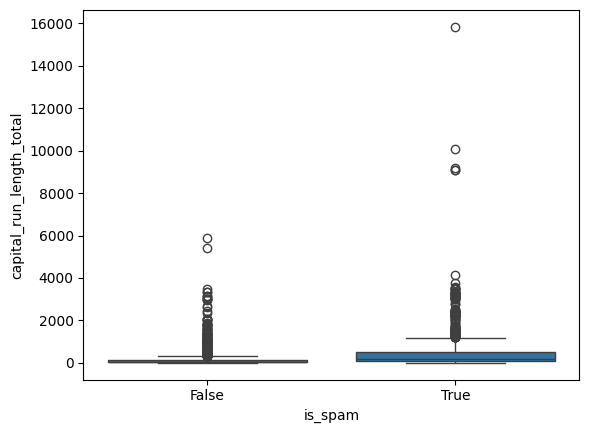

In [34]:
sns.boxplot(x='is_spam', y='capital_run_length_total', data=df)

<Axes: >

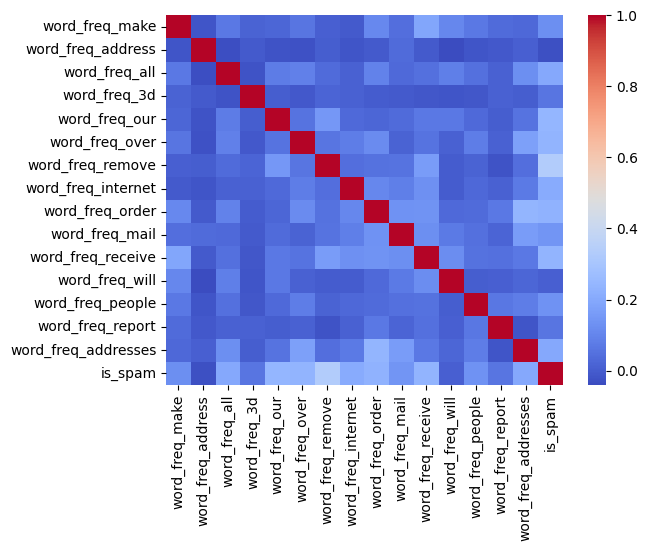

In [35]:
subset_cols = df.iloc[:, :15].columns.tolist() + ['is_spam']
sns.heatmap(df[subset_cols].corr(), annot=False, cmap='coolwarm')

In [36]:
for col in df.columns:
    if col != 'is_spam':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [37]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [38]:
df.shape
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

# Exploratory Data Analysis (EDA)

<Axes: >

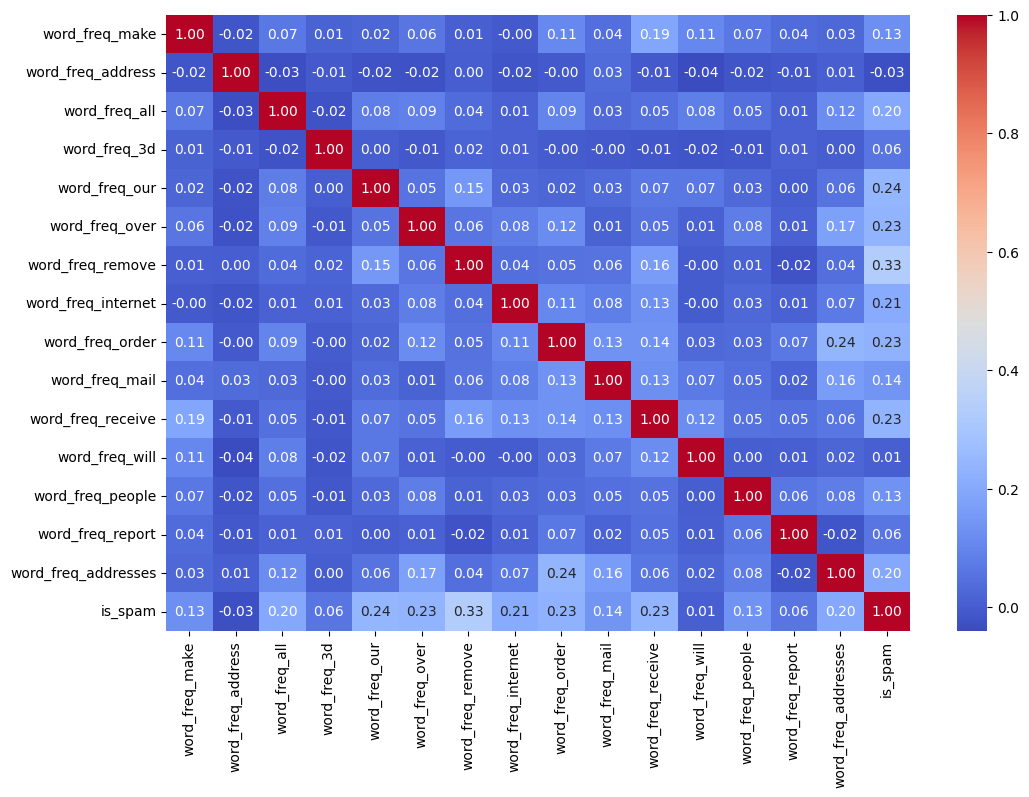

In [39]:
plt.figure(figsize=(12, 8))
subset_cols = df.columns[:15].tolist() + ['is_spam']
sns.heatmap(df[subset_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='is_spam', ylabel='capital_run_length_total'>

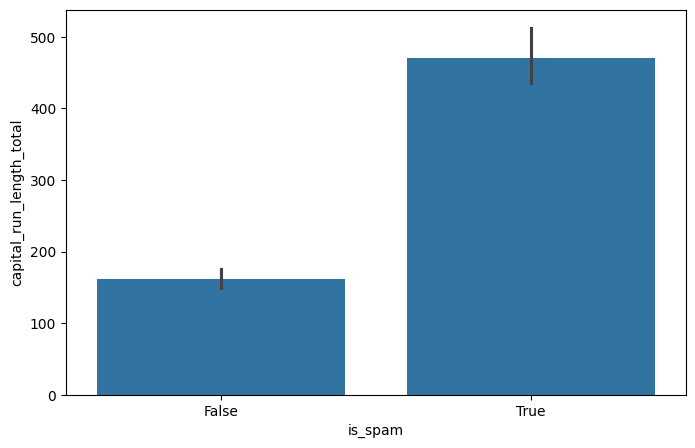

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='is_spam', y='capital_run_length_total', data=df)

# PCA

In [41]:
X = df.drop('is_spam', axis=1)
y = df['is_spam']

In [26]:
%pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 20.8 MB/s  0:00:00m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 36.0 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [44]:
scaler = StandardScaler()